* Scikit-learn 에는 와인 등급을 나눈 wine 데이터가 있다. 와인은 다음 3등급으로 나누어져 있으며 13개의 numeric한 attribute로 이루어져 있다. instance의 수는 총 178개이다.

                - class_0
                - class_1
                - class_2

* 결정트리(Decision Tree) 분류함수를 이용하여 분류기(Classifier)를 만들고 성능을 측정하시오.
 - 모델: Decision tree, GINI 계수 이용
 - 훈련데이터와 평가데이터는 8:2로 구분
 - Confusion Matrix (오차행렬) 및 Accuracy, Precsion, Recall, F1 score 출력 (Macro average)
 - 결정트리 시각화 진행 (적절한 수준으로 가지치기 진행-예 depth 5)

In [35]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# 데이터 로드
wine = load_wine()
wine_data = wine.data

# 와인 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df['label'] = wine.target
wine_df.head(-5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750.0,2
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630.0,2
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510.0,2
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2


In [36]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(wine_data, wine_df['label'], test_size=0.2, random_state=11)

model = DecisionTreeClassifier(random_state=4)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acc, precision, recall, f1))

정확도: 0.972, 정밀도: 0.958, 재현율: 0.978,  F1: 0.966


[Text(0.4444444444444444, 0.9, 'color_intensity <= 3.82\ngini = 0.661\nsamples = 142\nvalue = [45.0, 56.0, 41.0]\nclass = class_1'),
 Text(0.2222222222222222, 0.7, 'proline <= 790.0\ngini = 0.111\nsamples = 51\nvalue = [3, 48, 0]\nclass = class_1'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]\nclass = class_1'),
 Text(0.3333333333333333, 0.5, 'color_intensity <= 3.435\ngini = 0.49\nsamples = 7\nvalue = [3, 4, 0]\nclass = class_1'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = class_1'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = class_0'),
 Text(0.6666666666666666, 0.7, 'flavanoids <= 1.58\ngini = 0.576\nsamples = 91\nvalue = [42, 8, 41]\nclass = class_0'),
 Text(0.5555555555555556, 0.8, '  False'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]\nclass = class_2'),
 Text(0.7777777777777778, 0.5, 'proline

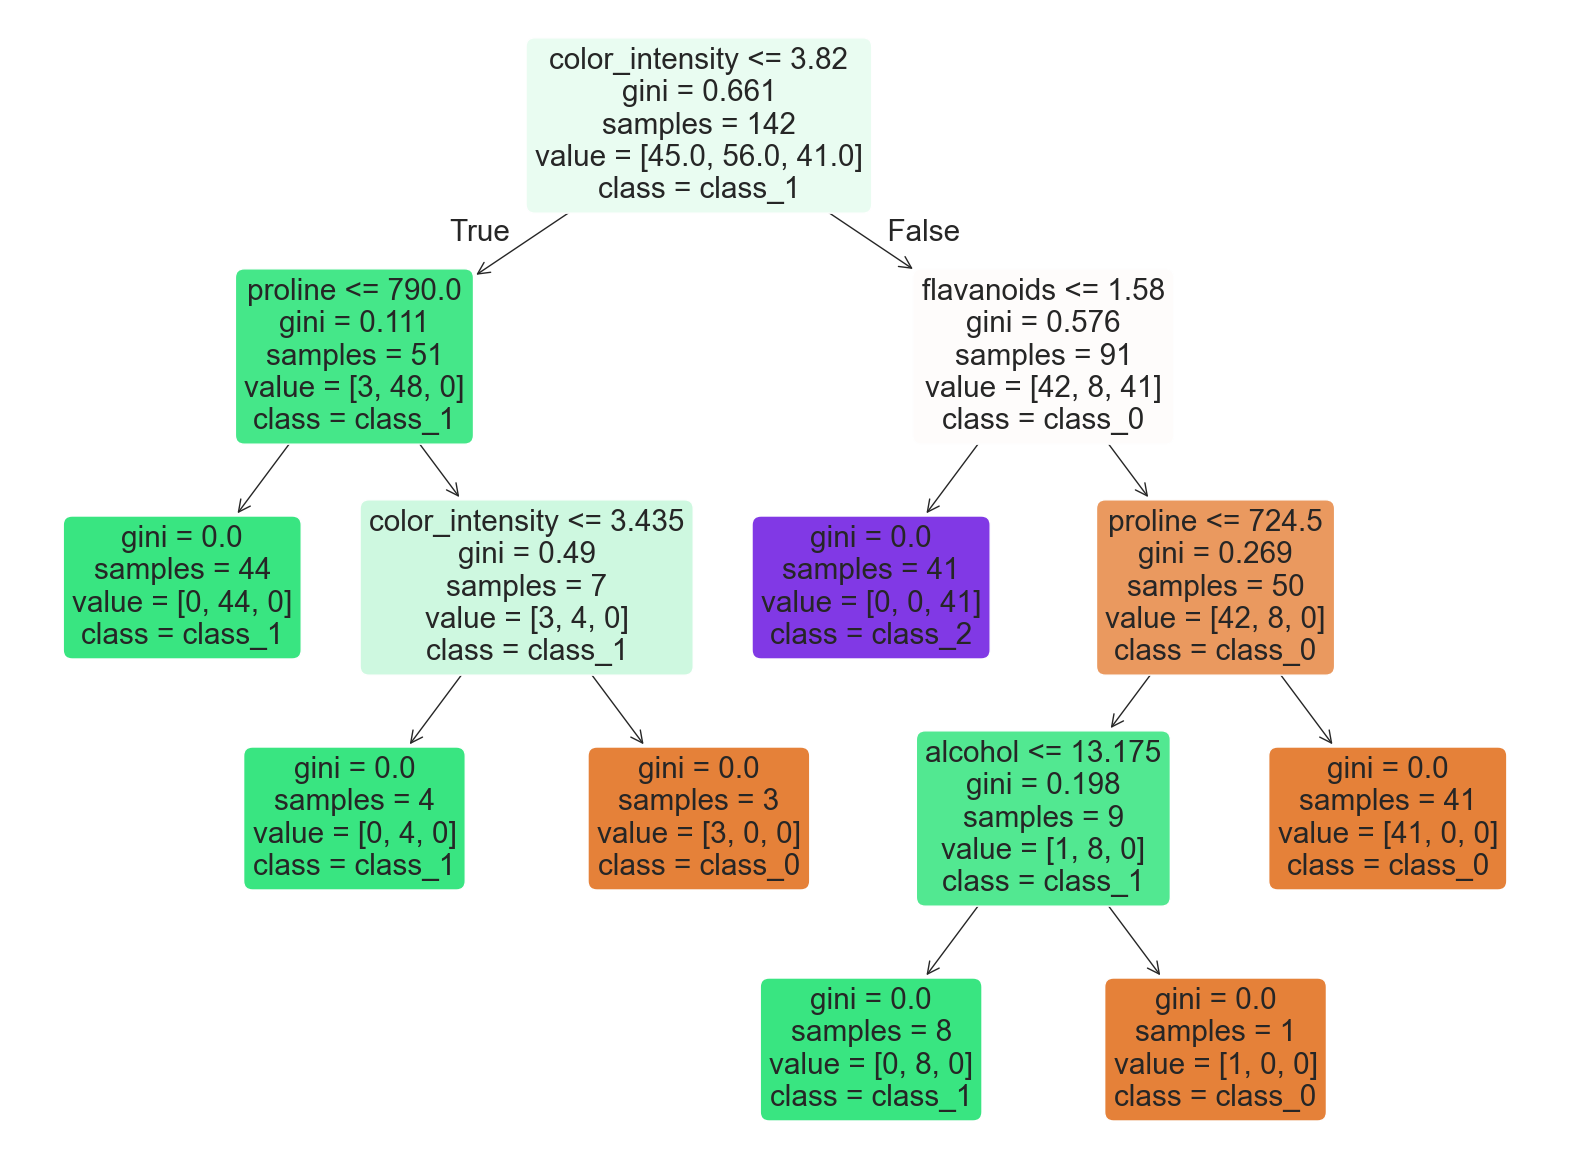

In [41]:
from matplotlib import pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 15))
tree.plot_tree(model,
               class_names=wine.target_names,
               feature_names=wine.feature_names,
               impurity=True,
               filled=True,
               rounded=True
               )